In [1]:
# To check the current working directory
import os
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC/Stock_Market_Analysis/exploraory_analysis'

In [2]:
# To change and check the current working directory
os.chdir('/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project/')
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project'

In [3]:
# Import our dependencies
import csv
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

## ETL Webscraping (Wikipedia - S&P 500 Companies)

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
req = requests.get(url)
print(req)
# <Response[200]>

<Response [200]>


In [5]:
soup = bs(req.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [6]:
table = soup.find("table", class_= "wikitable sortable")
df=pd.read_html(str(table))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry  \
0    MMM           3M     reports  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith     reports  Industrials         Building Products   
2    ABT       Abbott     reports  Health Care     Health Care Equipment   
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals   
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   

     Headquarters Location Date first added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [7]:
companies = df.drop(["SEC filings"], axis=1)
companies = companies.rename(columns={"GICS Sector": "GICS_Sector", "GICS Sub-Industry": "GICS_Sub_Industry","Headquarters Location": "Headquarters", "Date first added": "Date_First_Added"})
print(companies.head())

  Symbol     Security  GICS_Sector         GICS_Sub_Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

              Headquarters Date_First_Added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [8]:
companies.to_csv("companies.csv", index = False)

In [9]:
# Note: Companies file can be used to get the list of ALL tickers for automating

# ETL Stocks Data (Yahoo Finance)

In [10]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [11]:
df_Close = df_SPY["Close"]
df_Close.name = "SPY"

In [13]:
df_Close

Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2022-07-08    388.670013
2022-07-11    384.230011
2022-07-12    380.829987
2022-07-13    378.829987
2022-07-14    377.910004
Name: SPY, Length: 638, dtype: float64

In [15]:
## NOTE: This code is not needed because we do not extract stocks data ALL Tickers. 
# file_to_load = os.path.join("companies.csv")
# symbols = []
# with open(file_to_load) as ticker_data:
#     reader = csv.reader(ticker_data)
#     header = next(reader)
#     for row in reader:
#         ticker = row[0]
#         if ticker not in symbols:
#             symbols.append(ticker)
# print(symbols)

In [16]:
# NOTE: This script is working. However, it fails after getting some data. Need to work on it. 
# Perhaps, it is stalling because of the number of requests

# for symbol in symbols:
#     stock = web.DataReader(symbol, 'yahoo', start='2020-01-01', end = dt.datetime.today())
#     stock.to_csv(f"{symbol}.csv")
    
# print("Complete")

## 10 Companies in Health Care Sector

In [24]:
symbols = ["PFE", "LH", "CI", "BIIB", "ABT", "GILD", "UNH", "JNJ", "AMGN", "BMY"]

for symbol in symbols:
    stock = web.DataReader(symbol, 'yahoo', start='2020-01-01', end = dt.datetime.today())
    stock.to_csv(f"{symbol}.csv")
    
print("Complete")

Complete


In [25]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [ ]:
df_SPY

In [36]:
df = df_SPY[["Close"]]
df = df.rename(columns = {"Close": "SPY"})
df

,SPY
Date,
2020-01-02,324.869995
2020-01-03,322.410004
2020-01-06,323.640015
2020-01-07,322.730011
2020-01-08,324.450012
...,...
2022-07-08,388.670013
2022-07-11,384.230011
2022-07-12,380.829987


In [42]:
## Note: If you need another column, Change "Close" to respective column, e.g., "Volume"
## Note: SPY is a standard dataset for getting ALL traded dates correctly, and any NULL values are dropped here, and SPY column is also dropped

symbols = ["PFE", "LH", "CI", "BIIB", "ABT", "GILD", "UNH", "JNJ", "AMGN", "BMY"]
def get_data(symbols):    
    df = df_SPY[["Close"]]
    df = df.rename(columns = {"Close": "SPY"})
    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col="Date", parse_dates = True, 
                         usecols = ["Date", "Close"], na_values = "nan")
        df_temp = df_temp.rename(columns = {"Close": symbol})
        df = df.join(df_temp)
    return df
df_health = get_data(symbols)
df_health.drop(columns="SPY")

,PFE,LH,CI,BIIB,ABT,GILD,UNH,JNJ,AMGN,BMY
Date,,,,,,,,,,
2020-01-02,37.134724,167.479996,204.940002,294.239990,86.949997,65.230003,292.500000,145.970001,240.100006,63.340000
2020-01-03,36.935486,167.229996,203.179993,290.850006,85.889999,65.070000,289.540009,144.279999,238.470001,62.779999
2020-01-06,36.888046,169.419998,206.919998,290.820007,86.339996,65.650002,291.549988,144.100006,240.300003,62.980000
2020-01-07,36.764706,169.160004,207.929993,290.089996,85.860001,65.120003,289.790009,144.979996,238.039993,63.930000
2020-01-08,37.058823,173.839996,211.410004,292.660004,86.209999,65.800003,295.899994,144.960007,238.220001,63.860001
...,...,...,...,...,...,...,...,...,...,...
2022-07-08,53.169998,243.940002,279.190002,218.800003,109.260002,62.840000,518.630005,178.279999,248.479996,75.379997
2022-07-11,52.889999,242.630005,279.910004,215.259995,108.889999,62.660000,516.950012,178.350006,247.779999,75.559998
2022-07-12,52.040001,239.910004,279.350006,215.580002,108.300003,62.340000,514.419983,175.850006,246.970001,75.010002


In [ ]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
# df_AAPL = web.DataReader('AAPL', 'yahoo', start='2020-01-01', end = dt.datetime.today())
# df_AAPL

In [ ]:
# df_AMZN = web.DataReader('AMZN', 'yahoo', start='2020-01-01', end = dt.datetime.today())
# df_AMZN

In [ ]:
# df_NFLX = web.DataReader('NFLX', 'yahoo', start='2020-01-01', end = dt.datetime.today())
# df_NFLX

In [ ]:
# df_GOOG = web.DataReader('GOOG', 'yahoo', start='2020-01-01', end = dt.datetime.today())
# df_GOOG

In [ ]:
# df_META = web.DataReader('META', 'yahoo', start='2020-01-01', end = dt.datetime.today())
# df_META

In [ ]:
# df_TSLA = web.DataReader('TSLA', 'yahoo', start='2020-01-01', end = dt.datetime.today())
# df_TSLA

<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

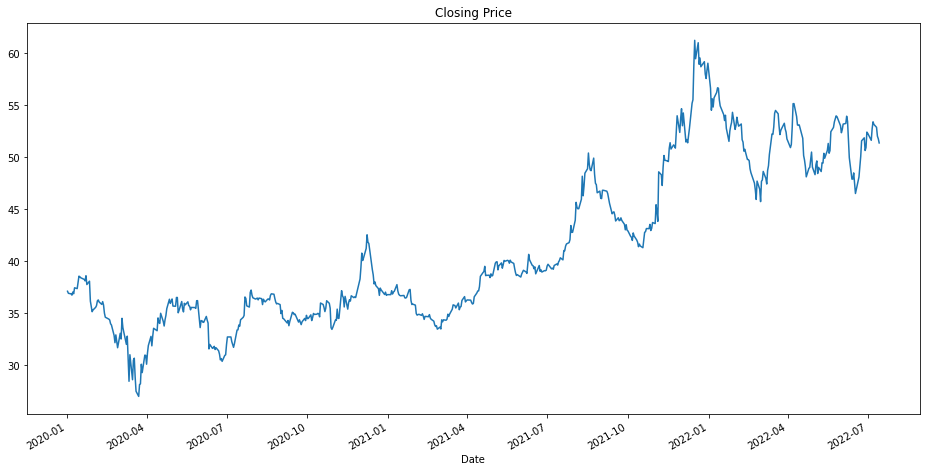

In [43]:
df_health["PFE"].plot(figsize = (16, 8), title = "Closing Price")

In [ ]:
df_AMZN["Close"].plot(figsize = (16, 8), title = "Closing Price")

In [ ]:
df_META["Close"].plot(figsize = (16, 8), title = "Closing Price")

In [ ]:
df_GOOG["Close"].plot(figsize = (16, 8), title = "Closing Price")

In [ ]:
df_META["Close"].plot(figsize = (16, 8), title = "Closing Price")

In [ ]:
df_TSLA["Close"].plot(figsize = (16, 8), title = "Closing Price")

In [ ]:
# Copy, uncomment, and change ticker symbols to recreate data frames for loading into SQL
# For other analyses, you can extract data as from the current data frames 

# tsla_sp_df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
# tsla_sp_df["Ticker"] = "TSLA"
# tsla_sp_df["Code"] = tsla_sp_df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)
# tsla_sp_df = tsla_sp_df[["Ticker", "Date", "Open", "High", "Low", "Close", "AdjClose", "Volume", "Code"]]
# tsla_sp_df['Date'] = pd.to_datetime(tsla_sp_df['Date'])
# tsla_sp_df
# tsla_sp_df.to_csv("tsla_sp_to_sql.csv", index=False)

In [ ]:
# frames = [aapl_sp_df,amzn_sp_df, nflx_sp_df, meta_sp_df, tsla_sp_df, goog_sp_df]

In [ ]:
# all_stock_df = pd.concat(frames)

In [ ]:
# all_stock_df.shape